In [23]:
# importing packages and modules
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import minimize
from utils import *
from plotting_utils import *
import dglm_hmm1
from scipy.stats import multivariate_normal, norm
import jax

In [24]:
# setting hyperparameters
S = 10 # sessions
T = 500 # trials per session
N = T * S # total data points
C = 2 # classes
K = 1 # states
D = 2 # features (sensory & bias)

In [25]:
# True Transition Matrix
trueP = np.ones((1,1))
print("True Transition Matrix P")
print(trueP)

True Transition Matrix P
[[1.]]


Session indicies
[0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]


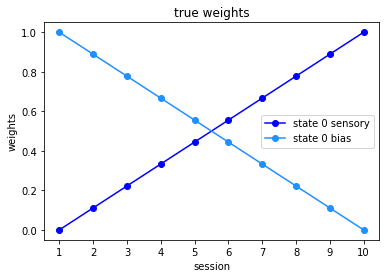

(5000, 1, 2, 2)


In [26]:
# True Weights and Session Start Indices
ourW = np.zeros((S,K,D))
ourW[:,0,1] = np.linspace(0,1,S) # state 1 sensory (increasing)
ourW[:,0,0] = np.linspace(1,0,S) # state 1 bias (decreasing)
trueW = np.zeros((N,K,D,C))
# change weight format to have session*trials points
sessInd = []
for sess in range(0,S):
    sessInd.append(sess*T)
    for t in range(0,T):
        trueW[sess*T+t,:,:,0] = ourW[sess,:,:]
sessInd.append(N)
print("Session indicies")
print(sessInd)
plotting_weights(trueW,sessInd,'true weights')
print(trueW.shape)

In [27]:

dGLM_HMM = dglm_hmm1.dGLM_HMM1(N,K,D,C)
simX, simY, simZ = dGLM_HMM.simulate_data(trueW, trueP, sessInd, save=True)

# simX = np.load('../data/simX.npy')
# simY = np.load('../data/simY.npy')
# simZ = np.load('../data/simZ.npy')

simPhi = dGLM_HMM.observation_probability(simX, trueW)

# folds = 5
# trainX, trainY, trainSessInd, testX, testY, testSessInd = dGLM_HMM.split_data(x=simX, y=simY, sessInd=sessInd,folds=folds)
# weightDistributionList = [['uniform', (-2,2)], ['normal', (0,1)]]
initP, initW = dGLM_HMM.generate_param(sessInd=sessInd, transitionDistribution=['dirichlet', (5, 1)], weightDistribution=['normal', (0,1)]) # initialize the model parameters
# checkP, checkW, checkLl = dGLM_HMM.fit(simX, simY,  initP, initW, sigma=trueSigma, sessInd=sessInd, pi0=None, maxIter=20, tol=1e-3) # fit the model
checkP, checkW, checkLl = dGLM_HMM.fit(simX, simY,  initP, initW, reshapeSigma(0.11, 1, 2), sessInd=sessInd, pi0=None, maxIter=250, tol=1e-3) # fit train data                

/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/scipy/optimize/optimize.py:1046: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


-3094.1725300978505


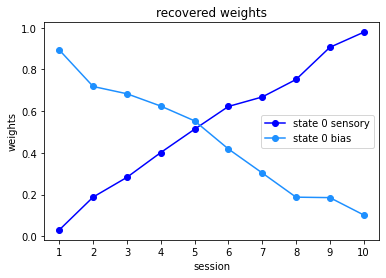

-3100.1397610513222


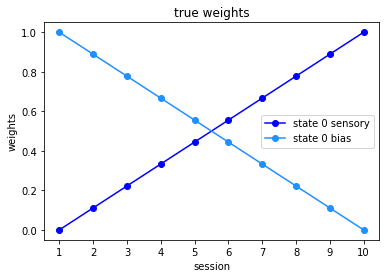

In [29]:
testPhi = dGLM_HMM.observation_probability(simX, checkW)
_, _, trueLl = dGLM_HMM.forward_pass(simY,trueP,testPhi)
print(trueLl)

plotting_weights(checkW, sessInd, 'recovered weights')

testPhi = dGLM_HMM.observation_probability(simX, trueW)
_, _, trueLl = dGLM_HMM.forward_pass(simY,trueP,testPhi)
print(trueLl)

plotting_weights(trueW, sessInd, 'true weights')

In [36]:
# True Weights and Session Start Indices
ourW = np.zeros((S,K,D))
ourW[:,0,1] = 0 # state 1 sensory (increasing)
ourW[:,0,0] = 1 # state 1 bias (decreasing)
trueW = np.zeros((N,K,D,C))
# change weight format to have session*trials points
sessInd = []
for sess in range(0,S):
    sessInd.append(sess*T)
    for t in range(0,T):
        trueW[sess*T+t,:,:,0] = ourW[sess,:,:]
sessInd.append(N)
print("Session indicies")
print(sessInd)


Session indicies
[0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]


In [34]:
dGLM_HMM = dglm_hmm1.dGLM_HMM1(N,K,D,C)
simX, simY, simZ = dGLM_HMM.simulate_data(trueW, trueP, sessInd, save=True)

# simX = np.load('../data/simX.npy')
# simY = np.load('../data/simY.npy')
# simZ = np.load('../data/simZ.npy')

simPhi = dGLM_HMM.observation_probability(simX, trueW)

# folds = 5
# trainX, trainY, trainSessInd, testX, testY, testSessInd = dGLM_HMM.split_data(x=simX, y=simY, sessInd=sessInd,folds=folds)
# weightDistributionList = [['uniform', (-2,2)], ['normal', (0,1)]]
initP, initW = dGLM_HMM.generate_param(sessInd=sessInd, transitionDistribution=['dirichlet', (5, 1)], weightDistribution=['normal', (0,1)]) # initialize the model parameters
# checkP, checkW, checkLl = dGLM_HMM.fit(simX, simY,  initP, initW, sigma=trueSigma, sessInd=sessInd, pi0=None, maxIter=20, tol=1e-3) # fit the model
checkP, checkW, checkLl = dGLM_HMM.fit(simX, simY,  initP, initW, reshapeSigma(0.1, 1, 2), sessInd=sessInd, pi0=None, maxIter=250, tol=1e-3) # fit train data                

-2925.978847610112


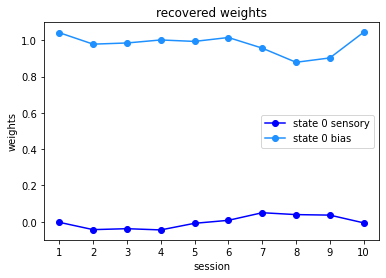

-2932.308437591114


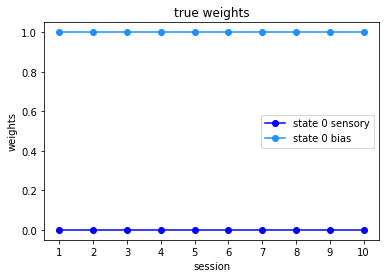

In [35]:
testPhi = dGLM_HMM.observation_probability(simX, checkW)
_, _, trueLl = dGLM_HMM.forward_pass(simY,trueP,testPhi)
print(trueLl)

plotting_weights(checkW, sessInd, 'recovered weights')

testPhi = dGLM_HMM.observation_probability(simX, trueW)
_, _, trueLl = dGLM_HMM.forward_pass(simY,trueP,testPhi)
print(trueLl)

plotting_weights(trueW, sessInd, 'true weights')

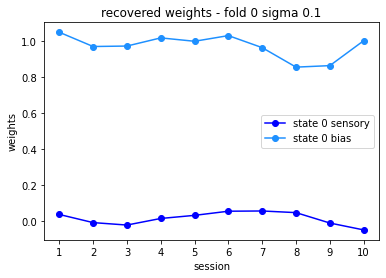

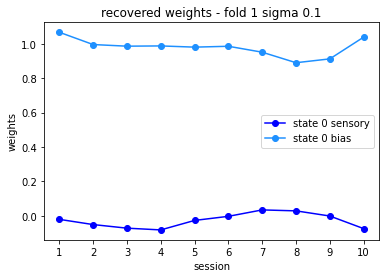

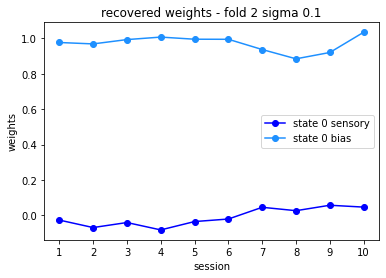

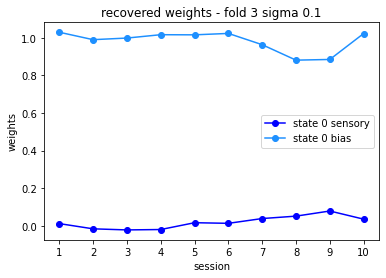

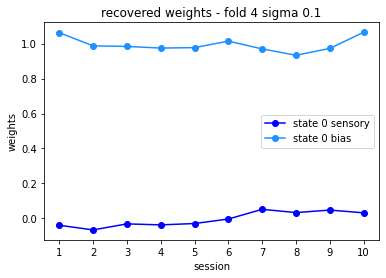

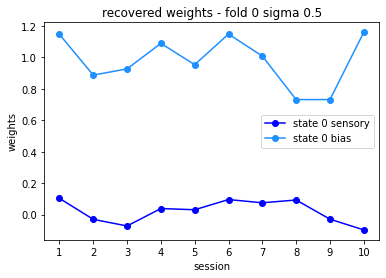

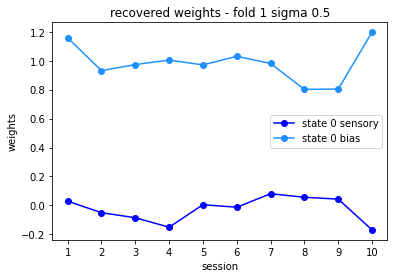

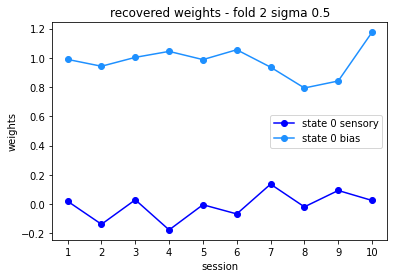

/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/scipy/optimize/optimize.py:1046: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/scipy/optimize/optimize.py:1046: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


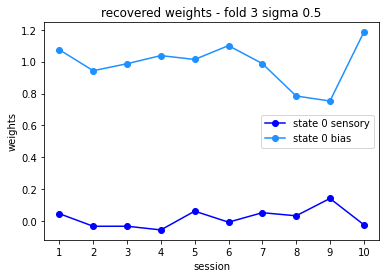

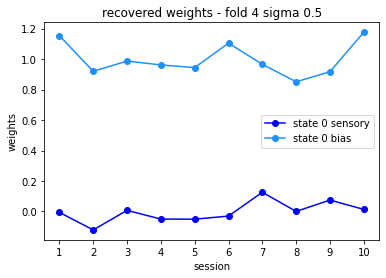

/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/scipy/optimize/optimize.py:1046: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


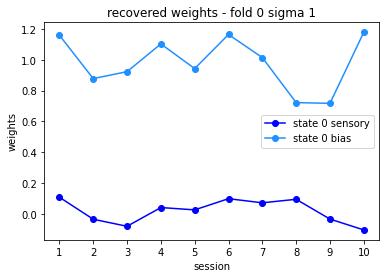

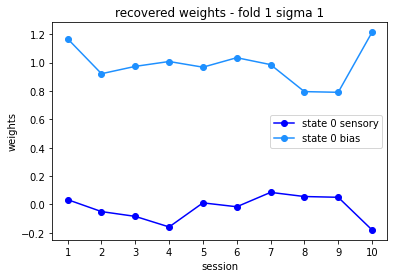

/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/scipy/optimize/optimize.py:1046: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


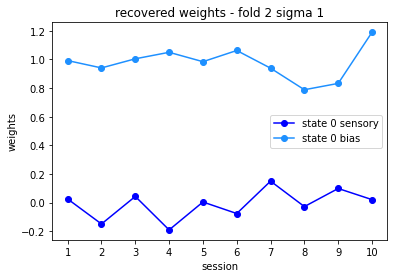

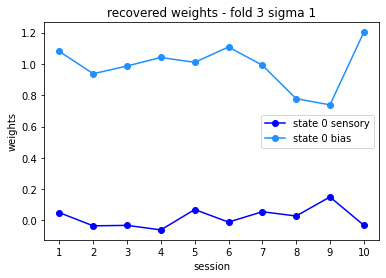

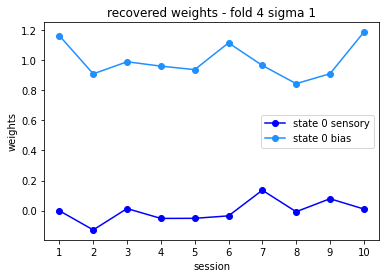

In [51]:
# Looking at graph of test log likelihood as function of sigma
sigmaList = [0.1,0.5,1] #[0.05,0.1,0.5,1,10,100]
folds = 5
trainX, trainY, trainSessInd, testX, testY, testSessInd = dGLM_HMM.split_data(x=simX, y=simY, sessInd=sessInd, folds=folds)
maxiter = 250 # 250 # maximum number of iterations

trainN = trainX[0].shape[0]
testLl = np.zeros((len(sigmaList)))
trainLl = np.zeros((folds, len(sigmaList), maxiter))
allP = np.zeros((len(sigmaList), K,K))
allW = np.zeros((len(sigmaList),N,K,D,C))
for indSigma in range(0, len(sigmaList)):  
    if (indSigma == 0):
        initP, initW = dGLM_HMM.generate_param(sessInd=sessInd, transitionDistribution=['dirichlet', (5, 1)], weightDistribution=['uniform', (-2,2)]) # initialize the model parameters
    else:
        initP = allP[indSigma-1]
        initW = allW[indSigma-1]
        
    temptestLl = np.zeros((folds))
    temptrainLl = np.zeros((folds, maxiter))
    tempP = np.zeros((folds,K,K))
    tempW = np.zeros((folds,trainN,K,D,C))
    tempW_reshaped = np.zeros((folds,N,K,D,C))

    for i in range(0, folds):    
        initW_reshaped = reshapeWeights(w=initW, oldSessInd=sessInd, newSessInd=trainSessInd[i])
        # fit on train data
        tempP[i], tempW[i], temptrainLl[i] = dGLM_HMM.fit(trainX[i], trainY[i],  initP, initW_reshaped, sigma=reshapeSigma(sigmaList[indSigma], K, D), sessInd=trainSessInd[i], pi0=None, maxIter=maxiter, tol=1e-3) # fit the model
        plotting_weights(tempW[i], trainSessInd[i], f'recovered weights - fold {i} sigma {sigmaList[indSigma]}')

        # reshaping fitted weights from train to test
        testW = reshapeWeights(w=tempW[i], oldSessInd=trainSessInd[i], newSessInd=testSessInd[i])
        # evaluate on test data
        testPhi = dGLM_HMM.observation_probability(testX[i], testW)
        _, _, temptestLl[i] = dGLM_HMM.forward_pass(testY[i],tempP[i],testPhi)

        # reshaping weights to match whole data set
        tempW_reshaped[i] = reshapeWeights(w=tempW[i], oldSessInd=trainSessInd[i], newSessInd=sessInd)
    
    # averaging across folds
    testLl[indSigma] = temptestLl.mean(axis=0)
    trainLl[:,indSigma,:] = temptrainLl # we want the full trajectory
    allP[indSigma] = tempP.mean(axis=0)
    allW[indSigma] = tempW_reshaped.mean(axis=0)
    
        


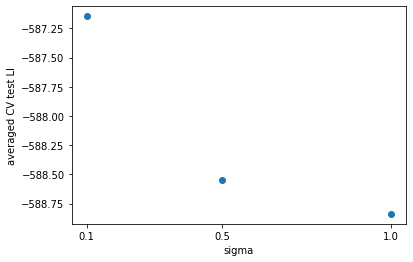

In [52]:
plt.scatter(sigmaList, testLl)
plt.ylabel("averaged CV test Ll")
plt.xticks(sigmaList)
plt.xlabel("sigma")
plt.show()

# def sigma_log_like_plot(testLl):
#     ''' 
#     '''
    

In [ ]:
# train LL plots



In [38]:
# Cross Validation Attempt
# dGLM_HMM = dglm_hmm1.dGLM_HMM1(N,K,D,C)  
# folds = 5
# trainX, trainY, trainSessInd, testX, testY, testSessInd = dGLM_HMM.split_data(x=simX, y=simY, sessInd=sessInd, folds=folds)
# #sigmaList = [0.05, 0.1, 0.2, 0.5, 1]
# sigmaList = [0.111]
# sigmaList = [reshapeSigma(s, K, D) for s in sigmaList]
# weightDistributionList =[['uniform', (-2,2)], ['normal', (0,1)]] # [['uniform', (-2,2)], ['normal', (0,1)]] 
# inits = 2 # set the number of initializations
# maxiter = 250 # 250 # maximum number of iterations
# # store values for each model
# trainN = trainX[0].shape[0]
# allLl = np.zeros((folds, len(sigmaList),len(weightDistributionList),inits))
# trainLl = np.zeros((folds, len(sigmaList),len(weightDistributionList),inits, maxiter))
# allP = np.zeros((folds, len(sigmaList),len(weightDistributionList),inits,K,K))
# allW = np.zeros((folds, len(sigmaList),len(weightDistributionList),inits,trainN,K,D,C))
# for i in range(0, folds):
#     for ind1 in range(0, len(sigmaList)):
#         for ind2 in range(0, len(weightDistributionList)):
#             for ind3 in range(0, inits):
#                 # fit on train data
#                 initP, initW = dGLM_HMM.generate_param(sessInd=trainSessInd[i], transitionDistribution=['dirichlet', (5, 1)], weightDistribution=weightDistributionList[ind2]) # initialize the model parameters
#                 allP[i, ind1,ind2,ind3], allW[i, ind1,ind2,ind3], trainLl[i, ind1,ind2,ind3] = dGLM_HMM.fit(trainX[i], trainY[i],  initP, initW, sigma=sigmaList[ind1], sessInd=trainSessInd[i], pi0=None, maxIter=maxiter, tol=1e-3) # fit the model
#                 plotting_weights(allW[i,ind1,ind2,ind3], trainSessInd[i], 'recovered - check')

#                 # reshaping fitted weights from train to test
#                 testW = reshapeWeights(w=allW[i, ind1,ind2,ind3], oldSessInd=trainSessInd[i], newSessInd=testSessInd[i])
#                 # evaluate on test data
#                 testPhi = dGLM_HMM.observation_probability(testX[i], testW)
#                 _, _, allLl[i, ind1,ind2,ind3] = dGLM_HMM.forward_pass(testY[i],allP[i, ind1,ind2,ind3],testPhi)
            
# np.save('../data/one_state_fittedCVLl', allLl)
# np.save('../data/one_state_fittedCVtrainLl', trainLl)
# np.save('../data/one_state_fittedCVW', allW)
# np.save('../data/one_state_fittedCVP', allP) 

In [ ]:
# finding best fit


In [37]:
# for ind1 in range(0, len(sigmaList)):
#     for ind2 in range(0, len(weightDistributionList)):
#         for ind3 in range(0, inits):
#             print(allLl[ind1,ind2,ind3])